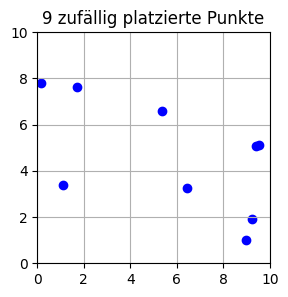

In [57]:
#%pip install numpy
#%pip install matplotlib

import numpy as np
import matplotlib.pyplot as plt

def plot():
    # Erstelle eine Grafik und plotte die Punkte
    plt.figure(figsize=(3, 3))
    plt.scatter(x, y, color='blue')  # Zeichne die Punkte als Scatterplot
    plt.xlim(0, 10)
    plt.ylim(0, 10)
    plt.grid(True)
    plt.title(f'{number_of_points} zufällig platzierte Punkte')
    plt.show()

# Anzahl der Punkte definieren
number_of_points = 9
# Erzeuge 'number_of_points' zufällige x- und y-Koordinaten im Bereich [0, 10]
x = np.random.rand(number_of_points) * 10
y = np.random.rand(number_of_points) * 10

plot()

# Kombiniere x und y zu Koordinatenpaaren
points = list(zip(x, y))


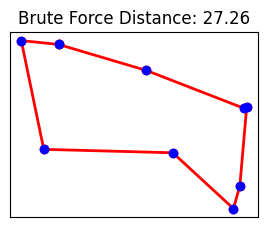

In [58]:
from itertools import permutations
import math

def plot_brute_force():
    # Erstelle eine Grafik und plotte die Punkte
    plt.clf()  # Aktuelle Grafik löschen

    # Extrahiere die x- und y-Koordinaten aller Punkte und plote sie als blauen Scatterplot.
    x_coords = [p[0] for p in points]
    y_coords = [p[1] for p in points]
    plt.scatter(x_coords, y_coords, color='blue', zorder=3)

    # Erstelle Listen für die x- und y-Koordinaten der Route.
    # Schließe die Route, indem du den Startpunkt am Ende wieder hinzufügst.
    xs = [p[0] for p in best_route_local] + [best_route_local[0][0]]
    ys = [p[1] for p in best_route_local] + [best_route_local[0][1]]
    # Verbinde die Punkte der Route mit einer roten Linie und markiere jeden Punkt.
    plt.plot(xs, ys, color='red', linewidth=2, marker='o')

    # Füge einen Titel hinzu, der die Gesamtdistanz der Route anzeigt.
    plt.title(f"Brute Force Distance: {best_distance:.2f}")

    # Entferne die Achsenbeschriftungen.
    plt.xticks([])
    plt.yticks([])

    fig = plt.gcf()
    fig.set_size_inches(fig.get_size_inches() * 0.5)
    plt.savefig("brute_force.png", dpi=300, format="png", bbox_inches="tight")
    plt.show()

# Vereinfachte Distanzfunktion unter Verwendung von math.dist.
def route_distance(route):
    # Für eine gegebene Route berechnen wir die Gesamtdistanz,
    # indem wir die Distanzen zwischen jedem aufeinanderfolgenden Punktpaar aufsummieren.
    # Dabei wird math.dist() verwendet, um die euklidische Distanz zwischen zwei Punkten zu berechnen.
    d = sum(math.dist(route[i], route[i+1]) for i in range(len(route)-1))
    
    # Abschließend wird die Distanz vom letzten Punkt zurück zum Startpunkt addiert,
    # um den Rundweg zu schließen.
    return d + math.dist(route[-1], route[0])


best_distance = math.inf # Initialisiere best_distance mit unendlich, sodass jede berechnete Route kürzer ist.
best_route_local = None

# Suche die beste Route, indem alle Permutationen geprüft werden | https://docs.python.org/3/library/itertools.html 
for route in permutations(points): # r-Länge, alle möglichen Permutationen ohne wiederholte Elemente
    d_current = route_distance(route)
    if d_current < best_distance:
        best_distance = d_current
        best_route_local = route
# FRAGE : Wie ist die Laufzeit dieser Funktion? | O(n!) https://de.wikipedia.org/wiki/Fakult%C3%A4t_(Mathematik)

plot_brute_force()


In [59]:
# #%pip install numpy
# #%pip install matplotlib

# import numpy as np
# import matplotlib.pyplot as plt

# # Anzahl der Punkte definieren
# number_of_points = 50
# # Erzeuge 'number_of_points' zufällige x- und y-Koordinaten im Bereich [0, 10]
# x = np.random.rand(number_of_points) * 10
# y = np.random.rand(number_of_points) * 10

# # Erstelle eine Grafik und plotte die Punkte
# plt.figure(figsize=(3, 3))
# plt.scatter(x, y, color='blue')  # Zeichne die Punkte als Scatterplot
# plt.xlim(0, 10)
# plt.ylim(0, 10)
# plt.grid(True)
# plt.title(f'{number_of_points} zufällig platzierte Punkte')
# plt.show()

# # Kombiniere x und y zu Koordinatenpaaren
# points = list(zip(x, y))

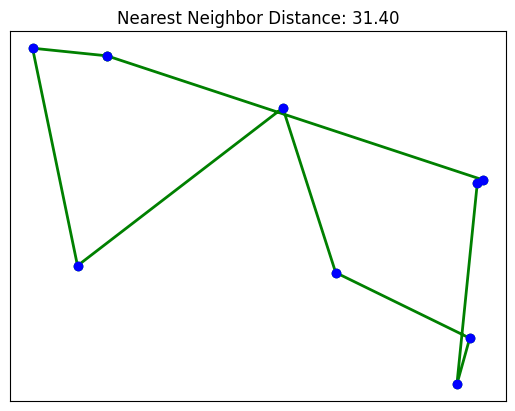

In [60]:
from IPython.display import display

def plot_nearest_neighbor():
    # Plotten der Nearest-Neighbor-Route:
    plt.clf()  # Aktuelle Grafik löschen
    # Extrahiere die x- und y-Koordinaten aller Punkte und plote sie als blauen Scatterplot.
    x_coords = [p[0] for p in points]
    y_coords = [p[1] for p in points]
    plt.scatter(x_coords, y_coords, color='blue', zorder=5)

    # Erstelle Listen für die x- und y-Koordinaten der Route.
    # Schließe die Route, indem du den Startpunkt am Ende wieder hinzufügst.
    xs_nn = [p[0] for p in nn_route] + [nn_route[0][0]]
    ys_nn = [p[1] for p in nn_route] + [nn_route[0][1]]
    # Verbinde die Punkte der Route mit einer grünen Linie und markiere jeden Punkt.
    plt.plot(xs_nn, ys_nn, color='green', linewidth=2, marker='o')

    # Füge einen Titel hinzu, der die Gesamtdistanz der Route anzeigt.
    plt.title(f"Nearest Neighbor Distance: {nn_distance:.2f}")

    # Entferne die Achsenbeschriftungen.
    plt.xticks([])
    plt.yticks([])
    plt.savefig("nearest_neighbor.png", dpi=300, format="png", bbox_inches="tight")
    plt.show()

def nearest_neighbor(points):
    # Falls keine Punkte vorhanden sind, gebe eine leere Liste zurück.
    if not points:
        return []
    
    route = [points[0]]    # Beginne die Route mit dem ersten Punkt.
    
    remaining_points = points[1:] # Erstelle eine Liste der noch nicht besuchten Punkte (außer dem Startpunkt).
    
    # Solange noch Punkte übrig sind:
    while remaining_points:
        # Der aktuelle Punkt ist immer der letzte in der Route.
        current = route[-1]
        # Finde den nächsten Punkt, der am nächsten zum aktuellen liegt.
        nearest = min(remaining_points, key=lambda p: math.dist(current, p))
        # Füge diesen Punkt der Route hinzu.
        route.append(nearest)
        # Entferne den neu besuchten Punkt aus der Liste der verbleibenden Punkte.
        remaining_points.remove(nearest)
    
    return route
    # FRAGE : Wie ist die Laufzeit dieser Funktion? | O(n^2) wesentlich schneller als o(n!)

nn_route = nearest_neighbor(points) # Berechne die Route

nn_distance = route_distance(nn_route) # Berechne die Gesamtdistanz der gefundenen Route, inklusive Rückweg zum Startpunkt.


plot_nearest_neighbor()



In [ ]:
from ipywidgets import Play, IntSlider, jslink, VBox, Output
from IPython.display import display

# Erstelle ein Output-Widget, das für die Anzeige der Animation verwendet wird.
out = Output()

# Erstelle ein Play-Widget, das automatisch den Animationsschritt über die Zeit erhöht.
play = Play(
    value=0,              # Startwert der Animation (Index 0)
    min=0,                # Minimaler Wert, entspricht dem ersten Index der nn_route
    max=len(nn_route),    # Maximaler Wert, basierend auf der Länge von nn_route
    step=1,               # Schrittweite: 1 (jeder Schritt entspricht einem Punkt in der Route)
    interval=500,         # Zeitintervall in Millisekunden zwischen den Schritten (500 ms)
    description="Press play"  # Beschriftung des Play-Widgets
)

# Erstelle einen Schieberegler (IntSlider), der den aktuellen Animationsschritt anzeigt.
slider = IntSlider(
    value=0,              # Startwert des Sliders (Index 0)
    min=0,                # Minimaler Wert
    max=len(nn_route),    # Maximaler Wert, basierend auf der Länge der Route in nn_route
    step=1,               # Schrittweise Erhöhung des Wertes um 1
    description='Step'    # Beschriftung des Sliders
)

# Verknüpfe das Play-Widget mit dem Slider, sodass sich ihre Werte synchronisieren.
jslink((play, 'value'), (slider, 'value'))

# Definiere eine Funktion, die bei einer Änderung des Slider-Wertes aufgerufen wird.
def on_slider_change(change):
    # Verwende 'out' als Kontextmanager, um alle bisherigen Ausgaben zu löschen
    # und nur die aktuelle Animation anzuzeigen.
    with out:
        out.clear_output(wait=True)  # Löscht die aktuelle Ausgabe, ohne das Widget zu flackern
        animate_nn(change['new'])     # Ruft die Funktion zur Animation auf und übergibt den neuen Wert

# Registriere die oben definierte Funktion als Observer für Änderungen des Slider-Wertes.
slider.observe(on_slider_change, names='value')

# Zeige die Widgets in einer vertikalen Anordnung (Box) an.
# Es werden das Play-Widget, der Slider und das Output-Widget (für die Animation) dargestellt.
display(VBox([play, slider, out]))
